In [1]:
import networkx as nx
import entropart as ep
from matplotlib import pyplot as plt
%matplotlib inline

# How to compute an entrogram

Tips:
- Use a `nx.Graph()` or a `nx.DiGraph()`.
- The edge weights should be saved in the edge data `weight`.
- Do not use high values for depth (the number of bars in the entrogram) otherwise the computation time will explode (yes, you need to compute the probability of each path of lenght `depth + 1`)


In [2]:
ndepth=4
karate = nx.karate_club_graph()
part = {n[0]: int(n[1] == "Mr. Hi") for n in karate.nodes.data("club")}
print(part)
H_ks, entrogram = ep.entrogram(
    karate,
    part,
    depth=ndepth
)
print(entrogram)

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 0, 10: 1, 11: 1, 12: 1, 13: 1, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 1, 20: 0, 21: 1, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0}
[[16.  9. 10.  6.  3.  4.  4.  4.  5.  2.  3.  1.  2.  5.  2.  2.  2.  2.
   2.  3.  2.  2.  2.  5.  3.  3.  2.  4.  3.  4.  4.  6. 12. 17.]]
[[0.1025641 ]
 [0.05769231]
 [0.06410256]
 [0.03846154]
 [0.01923077]
 [0.02564103]
 [0.02564103]
 [0.02564103]
 [0.03205128]
 [0.01282051]
 [0.01923077]
 [0.00641026]
 [0.01282051]
 [0.03205128]
 [0.01282051]
 [0.01282051]
 [0.01282051]
 [0.01282051]
 [0.01282051]
 [0.01923077]
 [0.01282051]
 [0.01282051]
 [0.01282051]
 [0.03205128]
 [0.01923077]
 [0.01923077]
 [0.01282051]
 [0.02564103]
 [0.01923077]
 [0.02564103]
 [0.02564103]
 [0.03846154]
 [0.07692308]
 [0.10897436]]
[0.03121669 0.00152005 0.00047187 0.00011017]


## Entropy rate

In [3]:
print(H_ks)
print(len(entrogram))

0.5555265456648675
4


## Entrogram

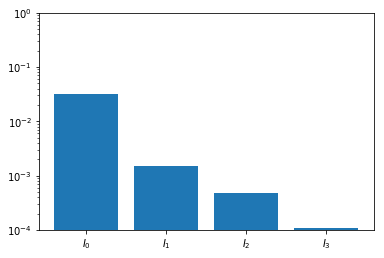

In [4]:
plt.bar(range(ndepth), entrogram)
plt.xticks(range(ndepth), [r'$I_{}$'.format(i) for i in range(ndepth)])
plt.semilogy()
plt.ylim(1e-4, 1)
plt.show()

In [5]:
bp, H = ep.best_partition(karate, kmax=10, alpha=0.2, compute_steady=False)
print(bp.string_dump(), H)
print(part.string_dump())

{'alpha': 0.2}
10 9333660888018888688888824525558733
      0.5723211339308376
9 2767550733007788578787888181314411
      0.6770131876424186
8 2252000633066677067676744474415411
      0.693939139600734
7 2242000533055566056565641343334411
      0.6987292713480571
6 2242000533055533053535341343334411
      0.6173458338901701
5 2212000433044433043434311313331111
      0.531547418828227
4 2212000233022233023232311313331111
      0.43549866405939275
3 0010000022000022002020211212221111
      0.34029392864009633
2 0000000010000011001010111111111111
      0.24750488567488982


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
g1 = nx.connected_caveman_graph(4, 20)

In [ ]:
ep.best_partition(g1, kmax=20)
# print(bp1.string_dump(), H1)

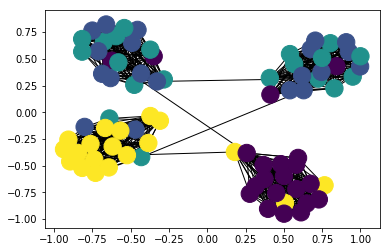

In [34]:
pos = nx.spring_layout(g1, 0.8)
nx.draw_networkx_edges(g1, pos)
nx.draw_networkx_nodes(g1, pos, node_color=list(bp1.values()))

In [40]:
net1 = ep.Network(g1)
out = ep.gt_sbm(net1)

In [42]:
out[0].string_dump()

'00000000000000000000111111111111111111112222222222222222222233333333333333333333'